In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import *
from uttils import *
%matplotlib inline

In [90]:
file_name = "Group Superannuation Balanced Fund.xlsx"
number_of_prev_data = 30

def metric(y_true, y_pred):
    return 100*((1 - y_pred/y_true)**2 )

model = models.load_model('Models/7pm_14_08_2020'+file_name+ '.h5')

In [91]:
scaler, X, Y = data_extractor('Data_Set/'+file_name, number_of_prev_data)
p = -1
X_prev = X[p].reshape((number_of_prev_data, ))

In [92]:
n_pred = 100
y_predict = np.zeros((n_pred, 1))
g = X_prev
for i in range(n_pred):
    y = model.predict(g.reshape((1,number_of_prev_data)))
    y_predict[i] = scaler.inverse_transform(y)
    g = np.append(g[1:], y[0])

(805, 1)


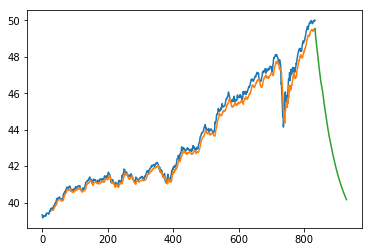

In [103]:
data = np.append(X[0], Y)
print(Y.shape)
data = data.reshape((-1, 1))
data = scaler.inverse_transform(data)
data_pred = scaler.inverse_transform(model.predict(X.reshape(X.shape[0], X.shape[1])))
d = (Y.shape[0])+number_of_prev_data+p-4
plt.plot(data)
plt.plot(np.linspace(30, 835, 805), data_pred)
plt.plot(np.linspace(d+3, d+n_pred, n_pred), y_predict)

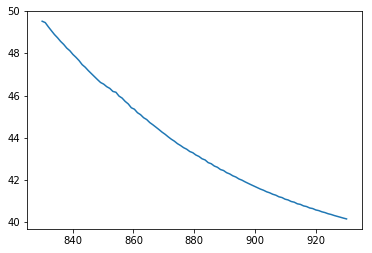

In [104]:
plt.plot(np.linspace(d, d+n_pred, n_pred), y_predict)